### Setup Neural Network for classification

In [10]:
# General imports and configuration
import torch
from torch import nn

n_samples = 1000
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### Generate a classification dataset

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples, noise=0.04, random_state=42)
# Print first 5 samples
print(f"First 5 X features:\n {X[:5]}")
print(f"First 5 y features:\n {y[:5]}")

First 5 X features:
 [[-0.01535155  0.39858357]
 [ 0.96563716 -0.46603945]
 [ 0.91129221 -0.400858  ]
 [ 0.39506559 -0.38671088]
 [-0.84362286  0.52969301]]
First 5 y features:
 [1 1 1 1 0]


In [3]:
# Check dataset
import pandas as pd
moons = pd.DataFrame({"X1" : X[:, 0], "X2": X[:, 1], "label": y})
moons.head(10)

,X1,X2,label
0,-0.015352,0.398584,1
1,0.965637,-0.466039,1
2,0.911292,-0.400858,1
3,0.395066,-0.386711,1
4,-0.843623,0.529693,0
5,0.584423,-0.337177,1
6,0.293686,-0.208100,1
7,-0.020433,0.441779,1
8,1.623326,-0.284398,1
9,0.677033,0.796771,0


In [4]:
# Check dataset
moons.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

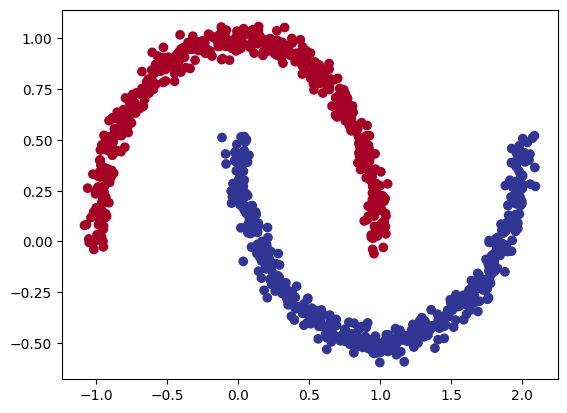

In [5]:
# Take a look visually
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.01535155  0.39858357] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()



This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).
We have two inputs for one output.

In [8]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[-0.0154,  0.3986],
         [ 0.9656, -0.4660],
         [ 0.9113, -0.4009],
         [ 0.3951, -0.3867],
         [-0.8436,  0.5297]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X,
        y,
        test_size=0.2, # 20% test, 80% train
        random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#### Create a model

In [11]:
class ClassificationModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = ClassificationModelV0().to(device)
model_0

ClassificationModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0574],
        [-0.0563],
        [-0.1734],
        [-0.0284],
        [-0.2515],
        [-0.2643],
        [-0.1063],
        [-0.1171],
        [-0.1662],
        [-0.0478]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### Setup loss function and optimizer